# TruthLens: Spotting Fake News
## Problem statement
In the digital age, the proliferation of fake news has become a significant challenge, influencing public opinion and causing widespread misinformation. Distinguishing between real and fake news articles is essential for maintaining the integrity of information and ensuring an informed society. To address this issue, we are utilizing a dataset containing various features such as article content, publication details, and source credibility. The objective of this challenge is to create a machine learning solution to classify news articles as real or fake. Our goal is to provide a tool that can help readers, journalists, and platforms identify and filter out misleading information, promoting a more trustworthy information ecosystem.

## Data collection
This data was downloaded from Kaggle.

**About the Dataset:**

**id:**       unique id for a news article       
**title:**    the title of a news article          
**author:**   author of the news article      
**text:**     the text of the article; could be incomplete   
**label:**    label that marks whether the news article is real or fake:      
    1: Fake news      
    0: real News    

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)


In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#dropping the id column which will not be used for model building
data.drop('id',axis=1,inplace=True)

In [ ]:
data

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
data.shape

(20800, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


As expected our data mainly consist of object columns.

In [ ]:
data.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

Since our data contains 20,000 entities dropping the missing values wouldn't have a large impact on our model building.

In [ ]:
#dropping the missing values
data = data.dropna()

In [ ]:
data.duplicated().sum()

44

In [ ]:
data=data.drop_duplicates()

### Target variable
Checking whether the target variable  is balanced.

In [ ]:
data['label'].value_counts()

0    10361
1     7880
Name: label, dtype: int64

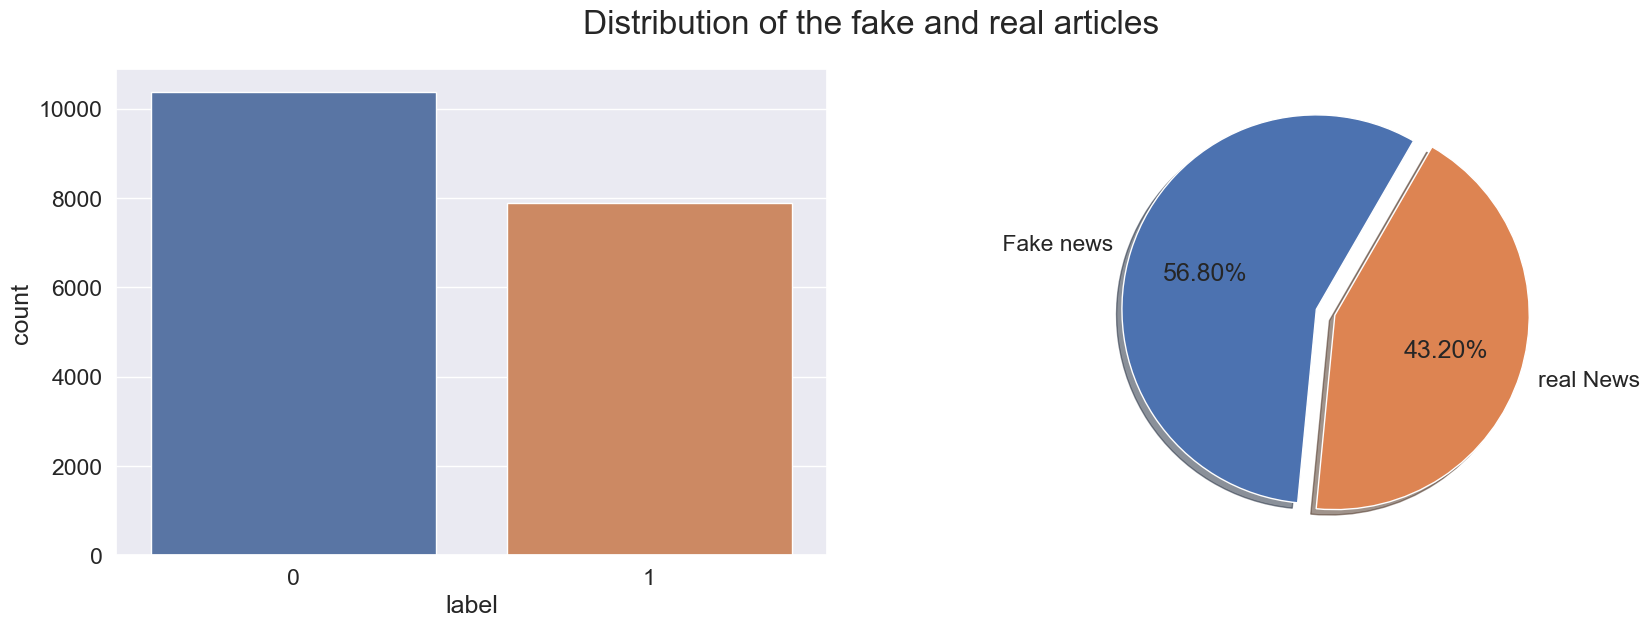

In [ ]:
# Displaying target distribution.

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), dpi=100)
sns.countplot(data['label'], ax=axes[0])
axes[1].pie(data['label'].value_counts(),
            labels=[' Fake news', 'real News'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0.05),
            startangle=60)
fig.suptitle('Distribution of the fake and real articles', fontsize=24)
plt.show()


The data is quite well balanced.

## Data Preparation, Tokenization, Stopwords Removal and Stemming

### sampling the data
Our data is a bit huge and due to lots of computation we are going to sample it to 5000 entities

In [ ]:
#Data sampling
df = data.sample(n=5000, random_state=42)

In [ ]:
df.head()

,title,author,text,label
253,Islamic State Supporting Former National Guard...,Jenna Leigh Richardson,Former National Guardsman turned Islamic State...,1
14014,How ‘Brexit’ Will Affect Travel to Europe - Th...,Elaine Glusac,"In the height of the summer travel season, Bri...",0
20451,Donald Trump Gettysburg Address RECAP,Truth Broadcast Network,7 hours ago 3 reports on What You Need to Kn...,1
11214,"Maxine Waters: If We Impeach Trump, He Can’t B...",Pam Key,Tuesday evening in Los Angeles at the Democr...,0
8363,Cartoons Mightier Than Swords (VIDEO),James Tracy,"in: Civil Rights , Free Speech , Multimedia , ...",1


In [ ]:
import nltk
import re
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopword = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
from textblob import TextBlob
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sylviabhoke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sylviabhoke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sylviabhoke/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Stop words are words that are commonly used in a language (like "and", "the", "is", etc.) but do not carry significant meaning and are often removed during text processing to focus on the more important words.
stop_words = set(stopwords.words("english"))
print(stop_words)


{'my', 'wasn', 'not', 'does', 'between', 'by', 'other', 'same', 'both', 'now', "shan't", 'too', 'itself', 'they', 'didn', 'than', 'how', "it's", "she's", 'being', 'at', 'we', 'me', 'do', 'shouldn', 'is', 'm', 'if', 'out', 'nor', 'ma', 'themselves', "won't", 'on', 'himself', 'was', 'shan', 'your', 'i', "couldn't", "mustn't", 'who', 'weren', 'won', 'wouldn', 'each', 'yourselves', 'again', 'own', 'when', 'isn', 'against', 'above', 'once', "wouldn't", 'few', 'whom', 'them', 'then', 'it', 's', 'but', 'be', 'him', 'under', 'y', 've', 't', "haven't", "isn't", 'he', 'hadn', 'should', 'an', 'having', "weren't", 'so', 'more', 'these', 'a', 'some', 'below', "should've", 'mustn', 'as', 'needn', 'over', 'with', 'there', 'most', 'very', "that'll", 'hers', 'herself', 'all', 'will', 'theirs', 'those', 'of', "you'd", 'which', 'any', 'and', "shouldn't", 'that', 'where', 'until', "you're", 'am', 'll', 'were', 'up', 'can', 'you', 'been', 'yours', 'mightn', 'aren', 'because', 'during', 'the', 'his', 'no', 

In [ ]:
#merging the title and text
df['content'] = df['title']+''+df['text']
df.head()

,title,author,text,label,content
253,Islamic State Supporting Former National Guard...,Jenna Leigh Richardson,Former National Guardsman turned Islamic State...,1,Islamic State Supporting Former National Guard...
14014,How ‘Brexit’ Will Affect Travel to Europe - Th...,Elaine Glusac,"In the height of the summer travel season, Bri...",0,How ‘Brexit’ Will Affect Travel to Europe - Th...
20451,Donald Trump Gettysburg Address RECAP,Truth Broadcast Network,7 hours ago 3 reports on What You Need to Kn...,1,Donald Trump Gettysburg Address RECAP7 hours a...
11214,"Maxine Waters: If We Impeach Trump, He Can’t B...",Pam Key,Tuesday evening in Los Angeles at the Democr...,0,"Maxine Waters: If We Impeach Trump, He Can’t B..."
8363,Cartoons Mightier Than Swords (VIDEO),James Tracy,"in: Civil Rights , Free Speech , Multimedia , ...",1,Cartoons Mightier Than Swords (VIDEO)in: Civil...


In [ ]:
# Define a function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'content' column
df['content'] = df['content'].apply(remove_stopwords)

# Display the DataFrame
print(df)


                                                   title  \
253    Islamic State Supporting Former National Guard...   
14014  How ‘Brexit’ Will Affect Travel to Europe - Th...   
20451              Donald Trump Gettysburg Address RECAP   
11214  Maxine Waters: If We Impeach Trump, He Can’t B...   
8363               Cartoons Mightier Than Swords (VIDEO)   
...                                                  ...   
3060   Trump Insists Mexico Will Pay for Wall After U...   
6700   Chris Wallace, In-House Moderate at Fox News, ...   
10802  Businesses Prepare For Hillary Presidency In A...   
6563   Donald Trump Backslides on Campaign Promise To...   
19032  Brooks: Trump ’Lashing Out’ in ’Extremely Dist...   

                                       author  \
253                    Jenna Leigh Richardson   
14014                           Elaine Glusac   
20451                 Truth Broadcast Network   
11214                                 Pam Key   
8363                              

In [ ]:
#converting the wordings to lower case
df['content'] = df['content'].str.lower()
df.head()

,title,author,text,label,content
253,Islamic State Supporting Former National Guard...,Jenna Leigh Richardson,Former National Guardsman turned Islamic State...,1,islamic state supporting former national guard...
14014,How ‘Brexit’ Will Affect Travel to Europe - Th...,Elaine Glusac,"In the height of the summer travel season, Bri...",0,‘brexit’ affect travel europe - new york times...
20451,Donald Trump Gettysburg Address RECAP,Truth Broadcast Network,7 hours ago 3 reports on What You Need to Kn...,1,donald trump gettysburg address recap7 hours a...
11214,"Maxine Waters: If We Impeach Trump, He Can’t B...",Pam Key,Tuesday evening in Los Angeles at the Democr...,0,"maxine waters: impeach trump, can’t build wall..."
8363,Cartoons Mightier Than Swords (VIDEO),James Tracy,"in: Civil Rights , Free Speech , Multimedia , ...",1,cartoons mightier swords (video)in: civil righ...


In [ ]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#removes all punctuation characters from each  review.
df['content'] = df['content'].apply(lambda doc:"".join([x for x in doc if x not in punctuation]))



In [ ]:
df['content']

253      islamic state supporting former national guard...
14014    ‘brexit’ affect travel europe  new york timesi...
20451    donald trump gettysburg address recap7 hours a...
11214    maxine waters impeach trump can’t build wall  ...
8363     cartoons mightier swords videoin civil rights ...
                               ...                        
3060     trump insists mexico pay wall us begins work  ...
6700     chris wallace inhouse moderate fox news less p...
10802    businesses prepare hillary presidency way sure...
6563     donald trump backslides campaign promise curb ...
19032    brooks trump ’lashing out’ ’extremely disturbi...
Name: content, Length: 5000, dtype: object

In [ ]:
## Remove URLS, htmls, emojis and punctuations
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Applying helper functions

df['content'] = df['content'].apply(lambda x: remove_URL(x))
df['content'] = df['content'].apply(lambda x: remove_emoji(x))
df['content'] = df['content'].apply(lambda x: remove_html(x))
df['content'] = df['content'].apply(lambda x: remove_punct(x))

In [ ]:
df['content']

253      islamic state supporting former national guard...
14014    ‘brexit’ affect travel europe  new york timesi...
20451    donald trump gettysburg address recap7 hours a...
11214    maxine waters impeach trump can’t build wall  ...
8363     cartoons mightier swords videoin civil rights ...
                               ...                        
3060     trump insists mexico pay wall us begins work  ...
6700     chris wallace inhouse moderate fox news less p...
10802    businesses prepare hillary presidency way sure...
6563     donald trump backslides campaign promise curb ...
19032    brooks trump ’lashing out’ ’extremely disturbi...
Name: content, Length: 5000, dtype: object

In [ ]:
#removes all commas from each review.
df['content'] = df['content'].apply(lambda v: re.sub(',', '', v))
df['content']

253      islamic state supporting former national guard...
14014    ‘brexit’ affect travel europe  new york timesi...
20451    donald trump gettysburg address recap7 hours a...
11214    maxine waters impeach trump can’t build wall  ...
8363     cartoons mightier swords videoin civil rights ...
                               ...                        
3060     trump insists mexico pay wall us begins work  ...
6700     chris wallace inhouse moderate fox news less p...
10802    businesses prepare hillary presidency way sure...
6563     donald trump backslides campaign promise curb ...
19032    brooks trump ’lashing out’ ’extremely disturbi...
Name: content, Length: 5000, dtype: object

In [ ]:
#tokenizing the content
df['content'] = df['content'].apply(word_tokenize)

In [ ]:
df['content']

253      [islamic, state, supporting, former, national,...
14014    [‘, brexit, ’, affect, travel, europe, new, yo...
20451    [donald, trump, gettysburg, address, recap7, h...
11214    [maxine, waters, impeach, trump, can, ’, t, bu...
8363     [cartoons, mightier, swords, videoin, civil, r...
                               ...                        
3060     [trump, insists, mexico, pay, wall, us, begins...
6700     [chris, wallace, inhouse, moderate, fox, news,...
10802    [businesses, prepare, hillary, presidency, way...
6563     [donald, trump, backslides, campaign, promise,...
19032    [brooks, trump, ’, lashing, out, ’, ’, extreme...
Name: content, Length: 5000, dtype: object

In [ ]:
#filter out words that are shorter than or equal to two characters from each review
df['content'] = df['content'].apply(lambda x: [w for w in x if len(w) > 2])
df['content']


253      [islamic, state, supporting, former, national,...
14014    [brexit, affect, travel, europe, new, york, ti...
20451    [donald, trump, gettysburg, address, recap7, h...
11214    [maxine, waters, impeach, trump, can, build, w...
8363     [cartoons, mightier, swords, videoin, civil, r...
                               ...                        
3060     [trump, insists, mexico, pay, wall, begins, wo...
6700     [chris, wallace, inhouse, moderate, fox, news,...
10802    [businesses, prepare, hillary, presidency, way...
6563     [donald, trump, backslides, campaign, promise,...
19032    [brooks, trump, lashing, out, extremely, distu...
Name: content, Length: 5000, dtype: object

In [ ]:
#Appling part-of-speech(POS) tag to text data
df['content'] = df['content'].apply(nltk.tag.pos_tag)
df['content']

253      [(islamic, JJ), (state, NN), (supporting, VBG)...
14014    [(brexit, NN), (affect, VBP), (travel, IN), (e...
20451    [(donald, JJ), (trump, NN), (gettysburg, NN), ...
11214    [(maxine, NN), (waters, NNS), (impeach, VBP), ...
8363     [(cartoons, NNS), (mightier, RBR), (swords, NN...
                               ...                        
3060     [(trump, NN), (insists, VBZ), (mexico, JJ), (p...
6700     [(chris, JJ), (wallace, NN), (inhouse, NN), (m...
10802    [(businesses, NNS), (prepare, VBP), (hillary, ...
6563     [(donald, JJ), (trump, NN), (backslides, NNS),...
19032    [(brooks, NNS), (trump, VBP), (lashing, VBG), ...
Name: content, Length: 5000, dtype: object

In [ ]:
# Converting part of speeches to wordnet format.

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


df['content'] = df['content'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

df['content']


253      [(islamic, a), (state, n), (supporting, v), (f...
14014    [(brexit, n), (affect, v), (travel, n), (europ...
20451    [(donald, a), (trump, n), (gettysburg, n), (ad...
11214    [(maxine, n), (waters, n), (impeach, v), (trum...
8363     [(cartoons, n), (mightier, r), (swords, n), (v...
                               ...                        
3060     [(trump, n), (insists, v), (mexico, a), (pay, ...
6700     [(chris, a), (wallace, n), (inhouse, n), (mode...
10802    [(businesses, n), (prepare, v), (hillary, a), ...
6563     [(donald, a), (trump, n), (backslides, n), (ca...
19032    [(brooks, n), (trump, v), (lashing, v), (out, ...
Name: content, Length: 5000, dtype: object

In [ ]:
# Applying word lemmatizer(converts the word to a meaningful base form. For example, "running" becomes "run", "better" becomes "good" if part-of-speech is considered.)


wnl = WordNetLemmatizer()

df['content'] =df['content'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

df['content']

253      [islamic, state, support, former, national, gu...
14014    [brexit, affect, travel, europe, new, york, ti...
20451    [donald, trump, gettysburg, address, recap7, h...
11214    [maxine, water, impeach, trump, can, build, wa...
8363     [cartoon, mightier, sword, videoin, civil, rig...
                               ...                        
3060     [trump, insist, mexico, pay, wall, begin, work...
6700     [chris, wallace, inhouse, moderate, fox, news,...
10802    [business, prepare, hillary, presidency, way, ...
6563     [donald, trump, backslides, campaign, promise,...
19032    [brook, trump, lash, out, extremely, disturb, ...
Name: content, Length: 5000, dtype: object

# Word Count

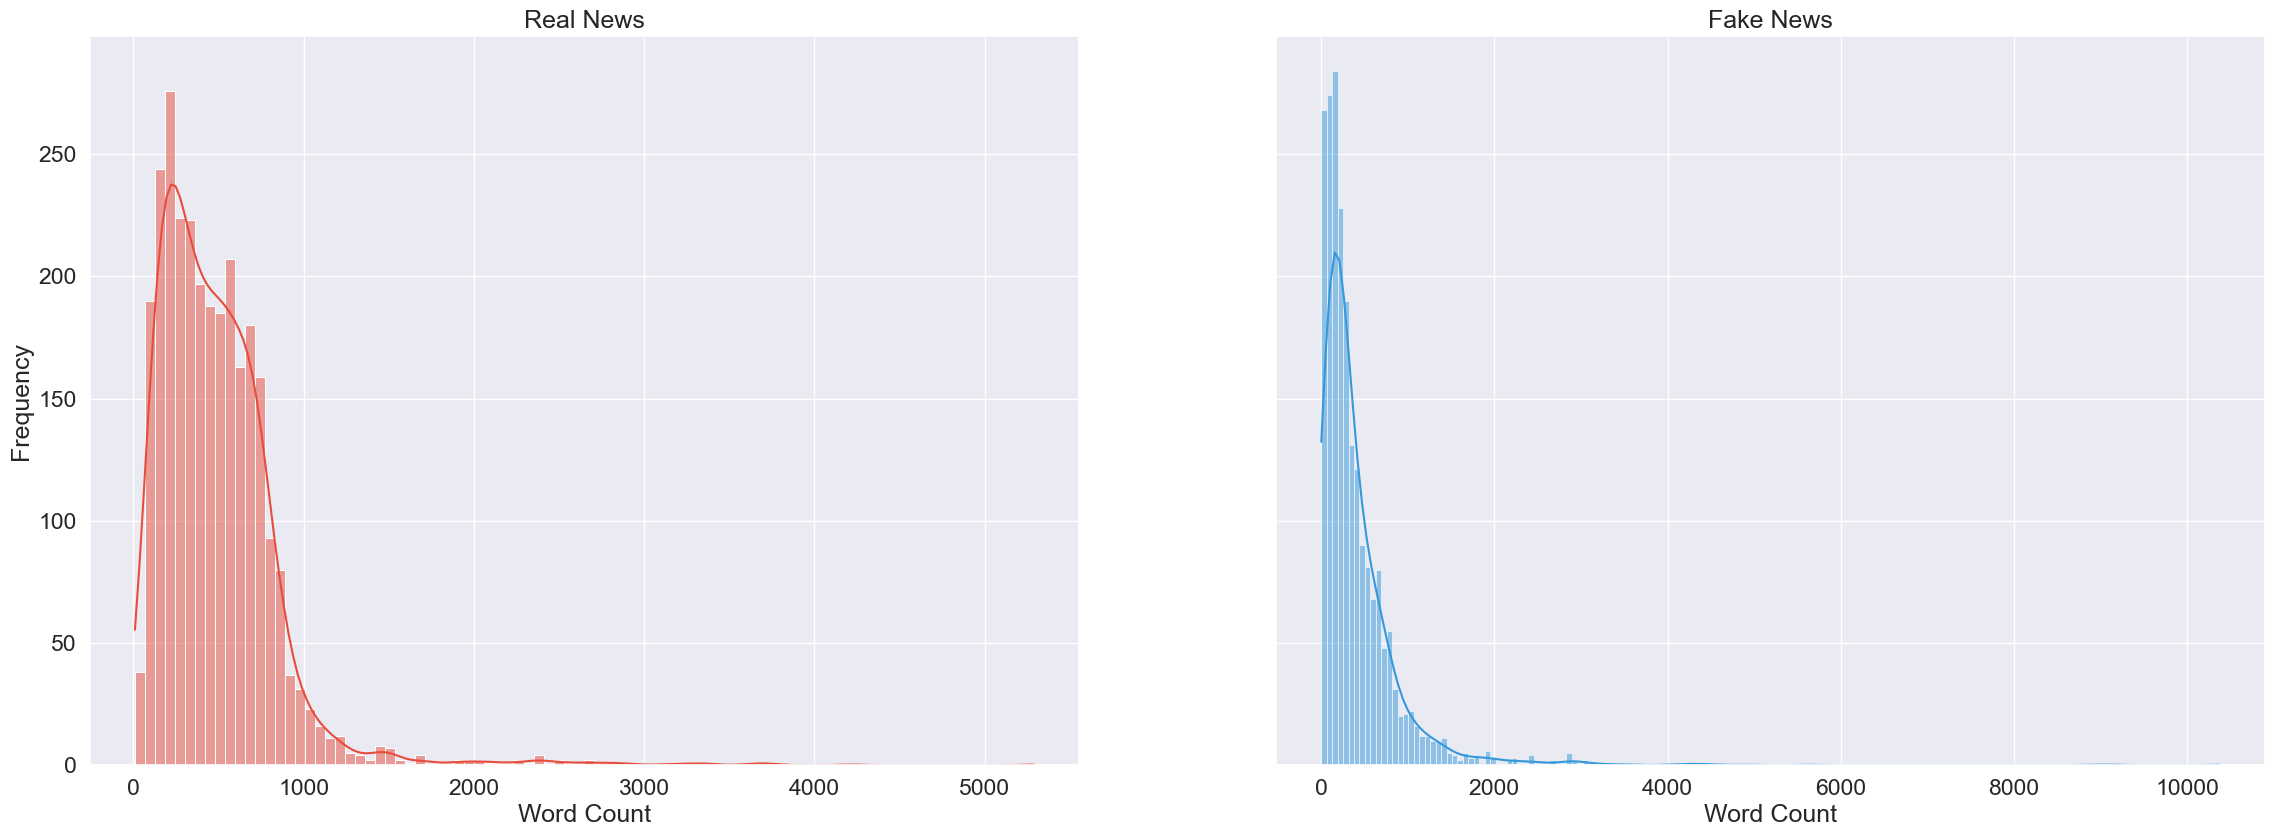

In [ ]:
def plot_word_number_histogram(textno, textye):
    # Drop NaN values and ensure all entries are strings
    textno = textno.dropna().astype(str)
    textye = textye.dropna().astype(str)

    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(25, 9), sharey=True)

    sns.histplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c', kde=True)
    sns.histplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#3498db', kde=True)

    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Real News')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('Fake News')
    plt.show()


plot_word_number_histogram(df[df['label'] == 0]['content'],
                           df[df['label'] == 1]['content'])


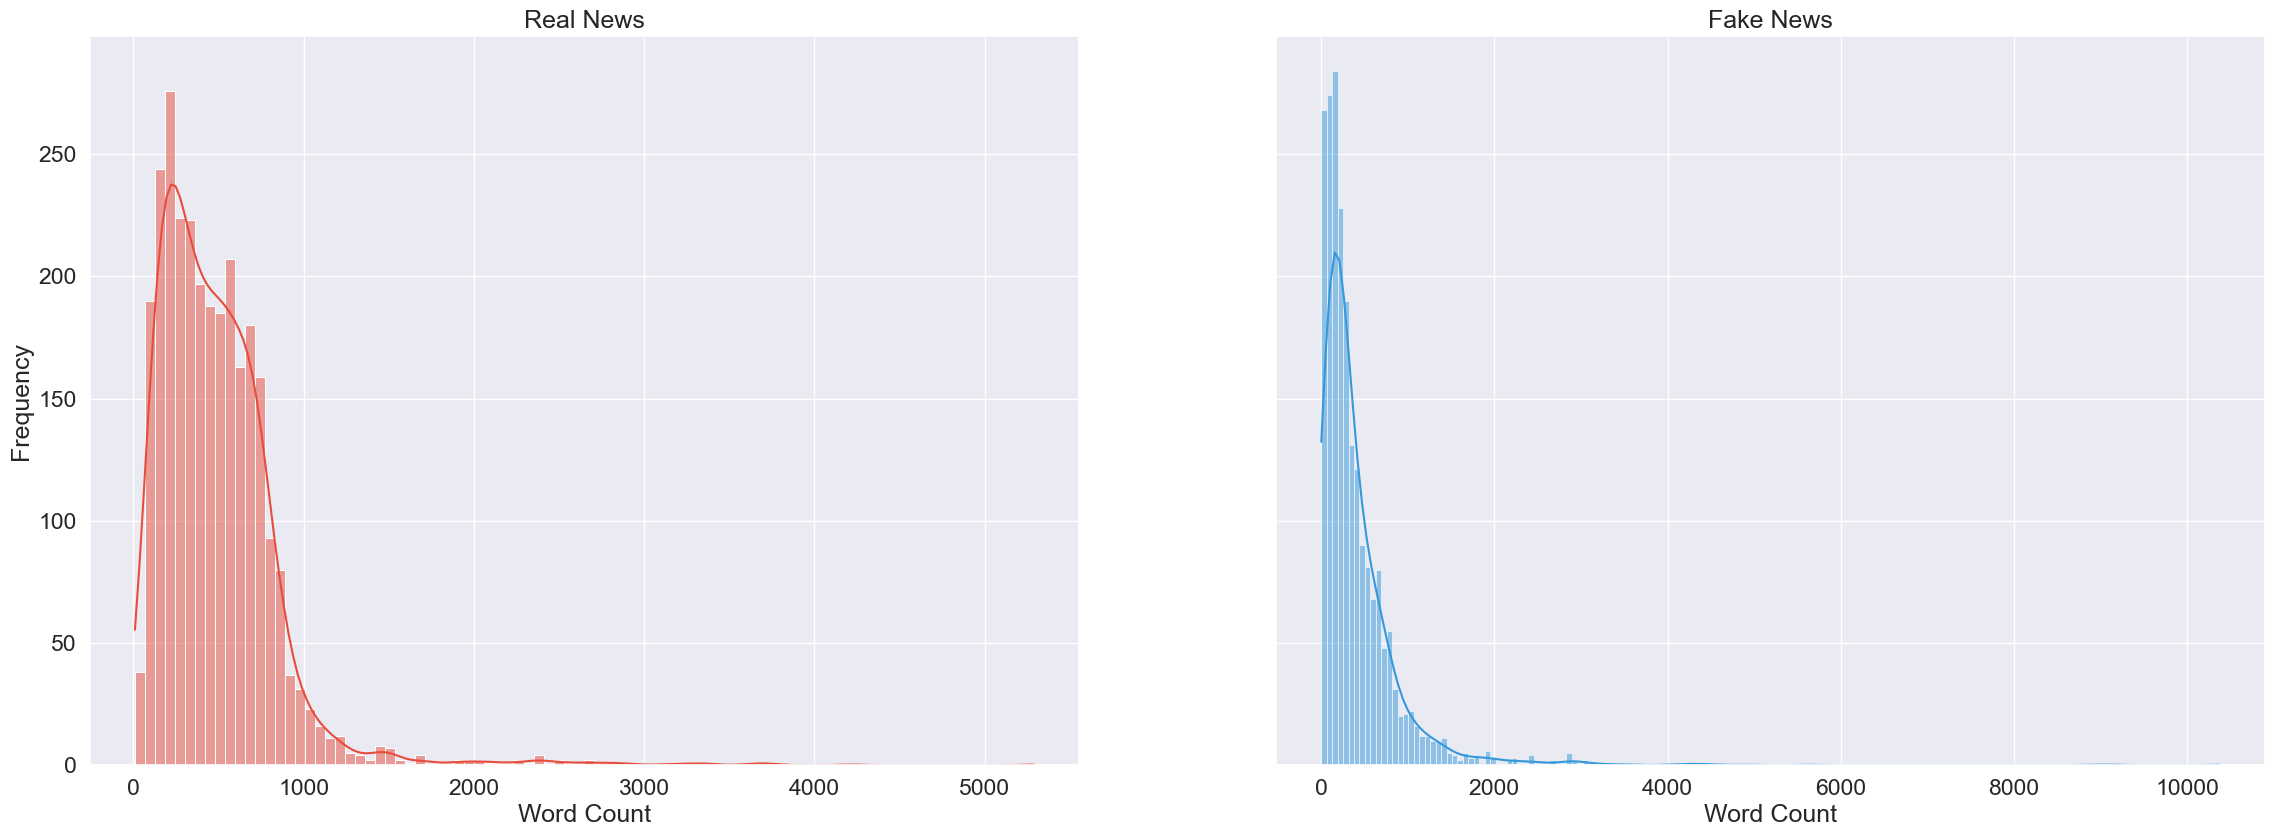

In [ ]:
def plot_word_len_histogram(textno, textye):

  ''' arguments represent the number of classes present. This function is used to calculate average word lengths'''

  fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
  sns.distplot(textno.str.split().apply(lambda x: [len(i) for i in x]).map(
      lambda x: np.mean(x)),
                ax=axes[0], color='#e74c3c')
  sns.distplot(textye.str.split().apply(lambda x: [len(i) for i in x]).map(
      lambda x: np.mean(x)),
                ax=axes[1], color='#e74c3c')
  # sns.distplot(textna.str.split().apply(lambda x: [len(i) for i in x]).map(
  #     lambda x: np.mean(x)),
  #              ax=axes[2], color='#e74c3c')

  axes[0].set_xlabel('Word Length')
  axes[0].set_ylabel('Frequency')

  axes[0].set_title('Real News')
  axes[1].set_xlabel('Word Length')
  axes[1].set_title('Fake News')
  # axes[2].set_xlabel('Word Length')
  # axes[2].set_title('-1')

  fig.suptitle('Mean Word Lengths', fontsize=24, va='baseline')
  fig.tight_layout()

plot_word_number_histogram(df[df['label'] == 0]['content'],
                           df[df['label'] == 1]['content'])



# Most Common Words

In [ ]:
lis = [
df[df['label'] == 0]['content'],
df[df['label'] == 1]['content'],
]

### Most common Unigrams
This are the most common single words which appear in our text

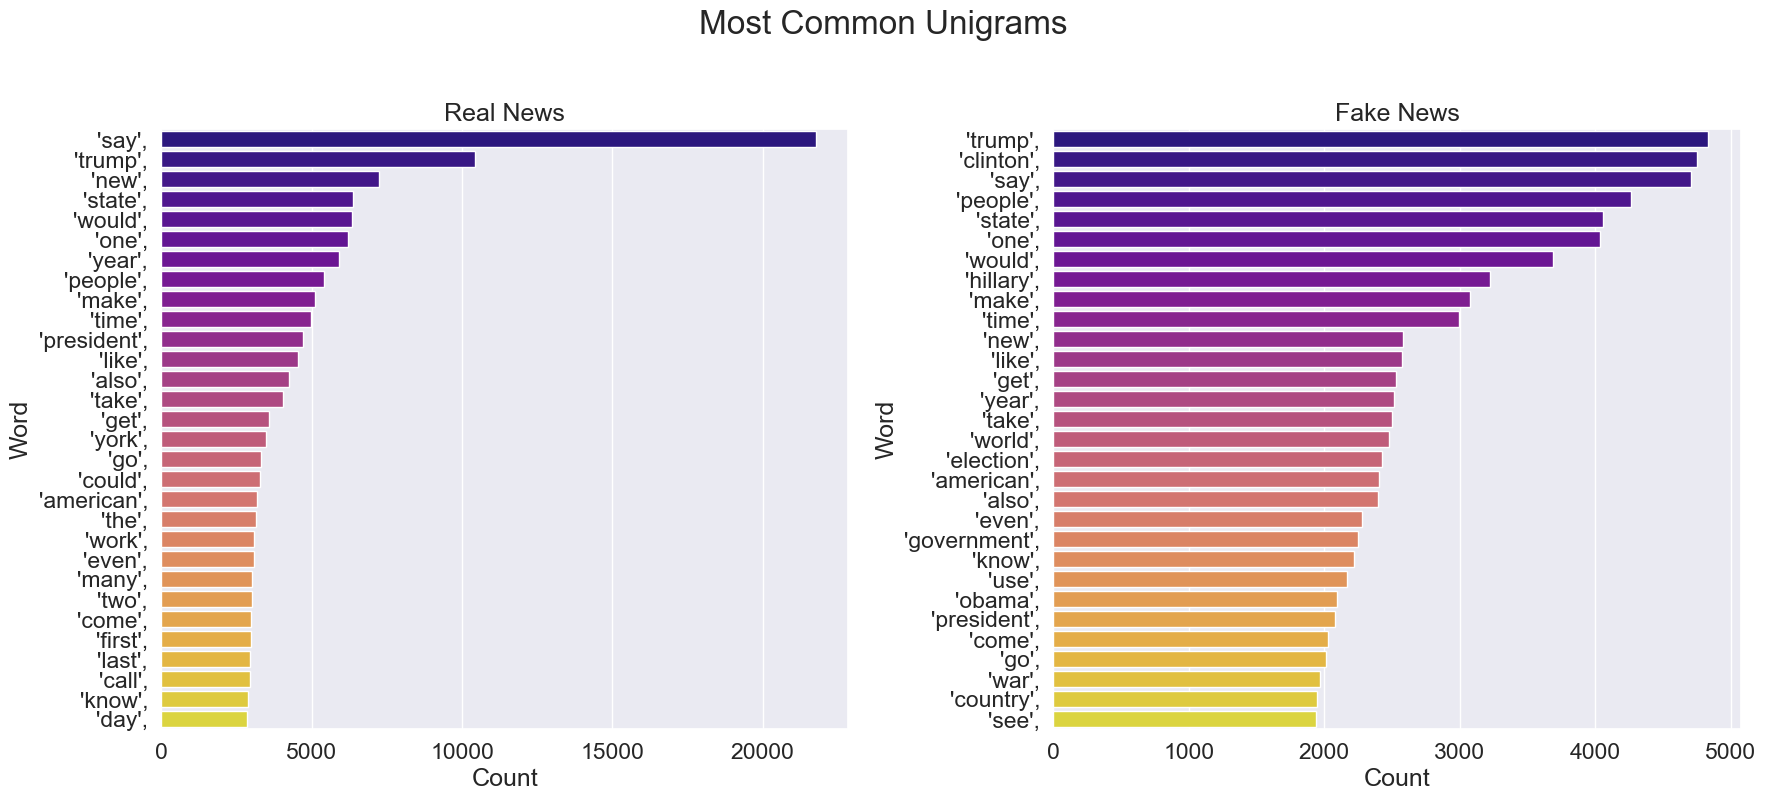

In [ ]:
from collections import Counter

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):
    # Drop NaN values and ensure all entries are strings
    i = i.dropna().astype(str)

    new = i.str.split().tolist()
    corpus = [word for sublist in new for word in sublist]

    counter = Counter(corpus)
    most = counter.most_common(30)

    x, y = zip(*most)

    sns.barplot(x=list(y), y=list(x), palette='plasma', ax=j)

axes[0].set_title('Real News')
axes[1].set_title('Fake News')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')

fig.suptitle('Most Common Unigrams', fontsize=24, va='baseline')
plt.tight_layout()
plt.show()



### Most Common Bigrams
This are the most common double words which appear in our text

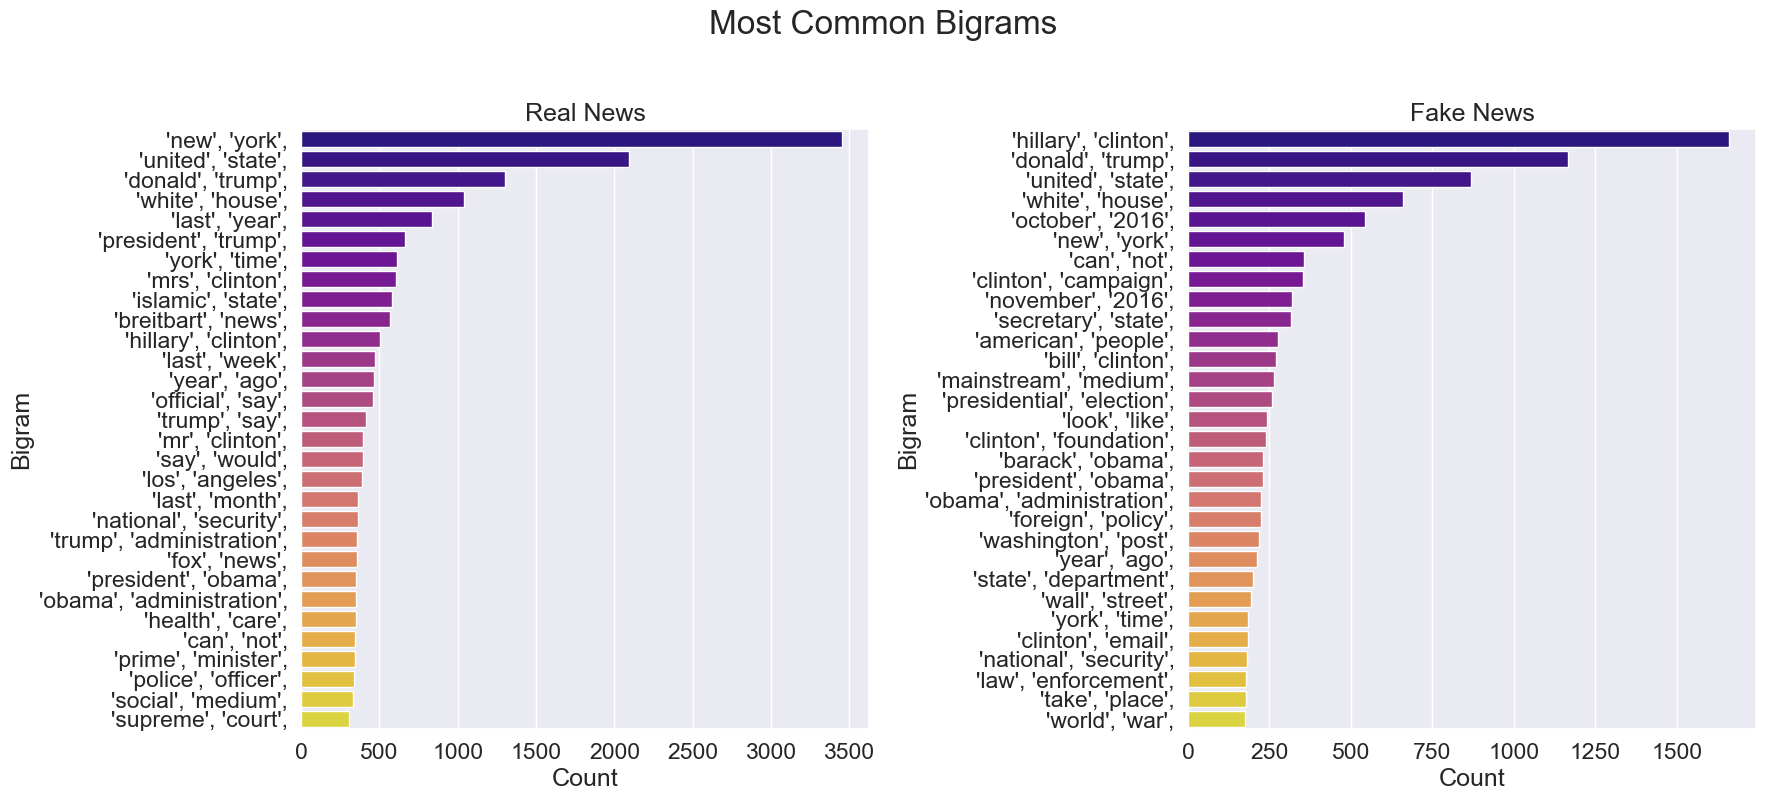

In [ ]:
# Define the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):
    # Drop NaN values and ensure all entries are strings
    i = i.dropna().astype(str)

    # Split each document into words
    new = i.str.split().tolist()

    # Flatten the list of lists and generate bigrams
    corpus = [bigram for sublist in new for bigram in nltk.bigrams(sublist)]

    # Count the bigrams
    counter = Counter(corpus)
    most = counter.most_common(30)

    # Separate bigrams and their counts
    x, y = zip(*most)

    # Convert bigrams to strings for plotting
    x = [' '.join(bigram) for bigram in x]

    # Create the bar plot
    sns.barplot(x=list(y), y=list(x), palette='plasma', ax=j)

# Set plot titles and labels
axes[0].set_title('Real News')
axes[1].set_title('Fake News')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Bigram')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Bigram')

fig.suptitle('Most Common Bigrams', fontsize=24, va='baseline')
plt.tight_layout()
plt.show()

### Most common trigrams
This are the most common Tripple  words which appear in our text.

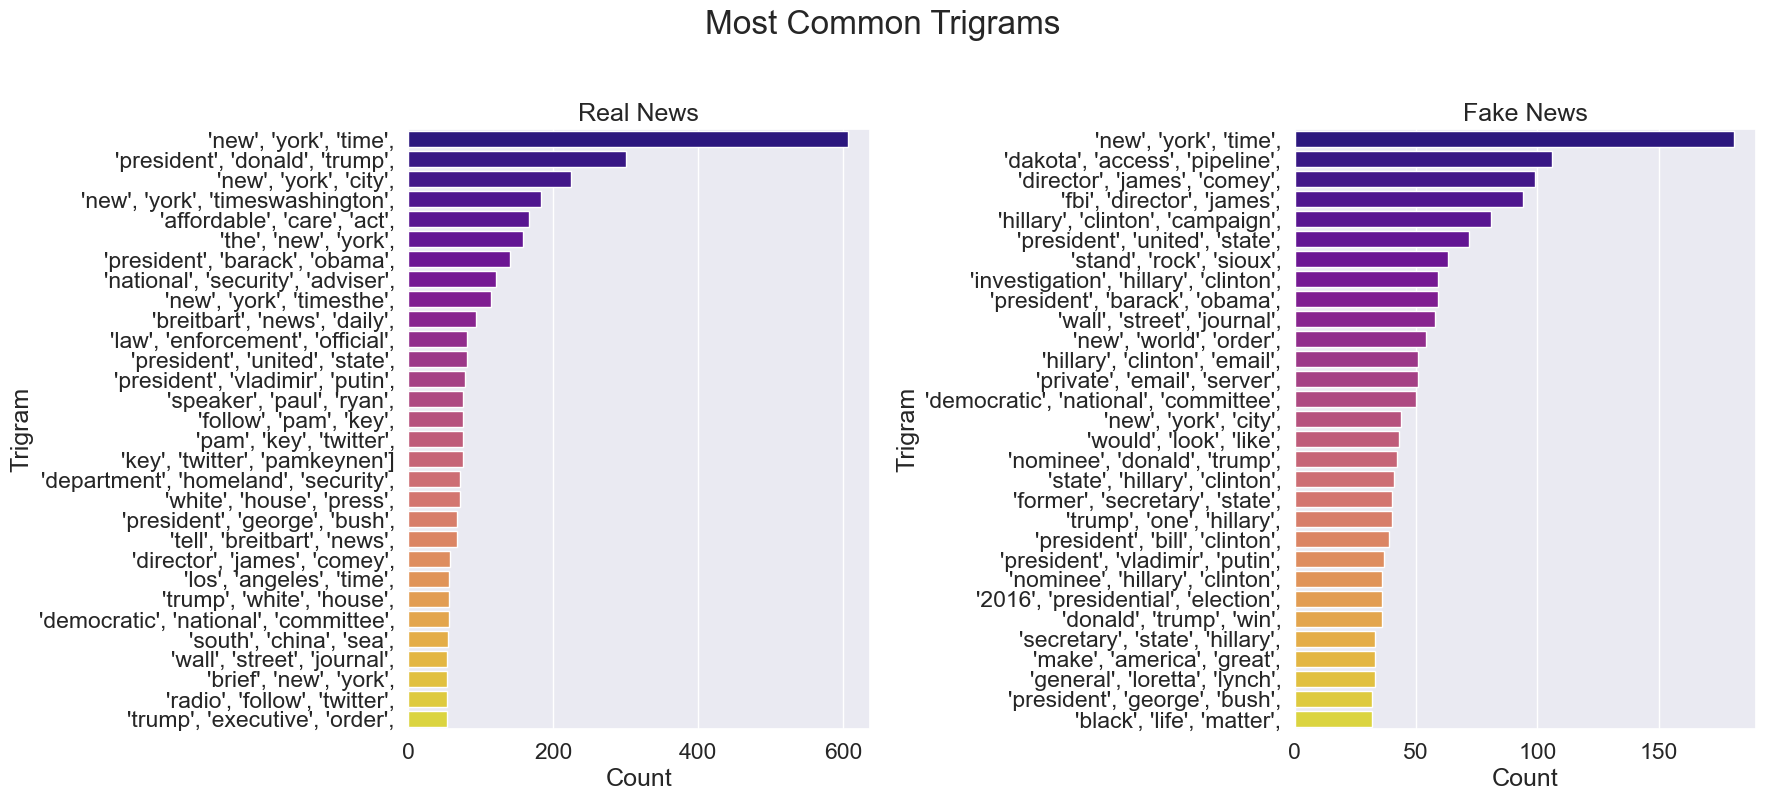

In [ ]:
# Define the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):
    # Drop NaN values and ensure all entries are strings
    i = i.dropna().astype(str)

    # Split each document into words
    new = i.str.split().tolist()

    # Flatten the list of lists and generate trigrams
    corpus = [trigram for sublist in new for trigram in nltk.trigrams(sublist)]

    # Count the trigrams
    counter = Counter(corpus)
    most = counter.most_common(30)

    # Separate trigrams and their counts
    x, y = zip(*most)

    # Convert trigrams to strings for plotting without quotation marks
    x = [' '.join(trigram) for trigram in x]

    # Create the bar plot
    sns.barplot(x=list(y), y=list(x), palette='plasma', ax=j)

# Set plot titles and labels
axes[0].set_title('Real News')
axes[1].set_title('Fake News')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Trigram')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Trigram')

fig.suptitle('Most Common Trigrams', fontsize=24, va='baseline')
plt.tight_layout()
plt.show()

# Word cloud
A WordCloud is a simple, weighted visual representation of the vocabulary contained in a textual dataset that allows us to estimate the contents of the data at a glance. It contains the most frequently occurring words in the data, with more frequent words appearing larger in size than less frequent ones.Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image



In [ ]:
# Concatenate all the text into a single string, with each article separated by a space.
text = " ".join([" ".join(j) for j in df['content']])


In [ ]:
df['content'] = df['content'].apply(lambda x: ' '.join(x))


In [ ]:
df['content']

253      islamic state support former national guardsma...
14014    brexit affect travel europe new york timesin h...
20451    donald trump gettysburg address recap7 hour ag...
11214    maxine water impeach trump can build wall brei...
8363     cartoon mightier sword videoin civil right fre...
                               ...                        
3060     trump insist mexico pay wall begin work new yo...
6700     chris wallace inhouse moderate fox news less p...
10802    business prepare hillary presidency way sure p...
6563     donald trump backslides campaign promise curb ...
19032    brook trump lash out extremely disturb way pro...
Name: content, Length: 5000, dtype: object

In [ ]:
FK_News = df[df['label'] == 1]['content'].str.cat(sep=' ')


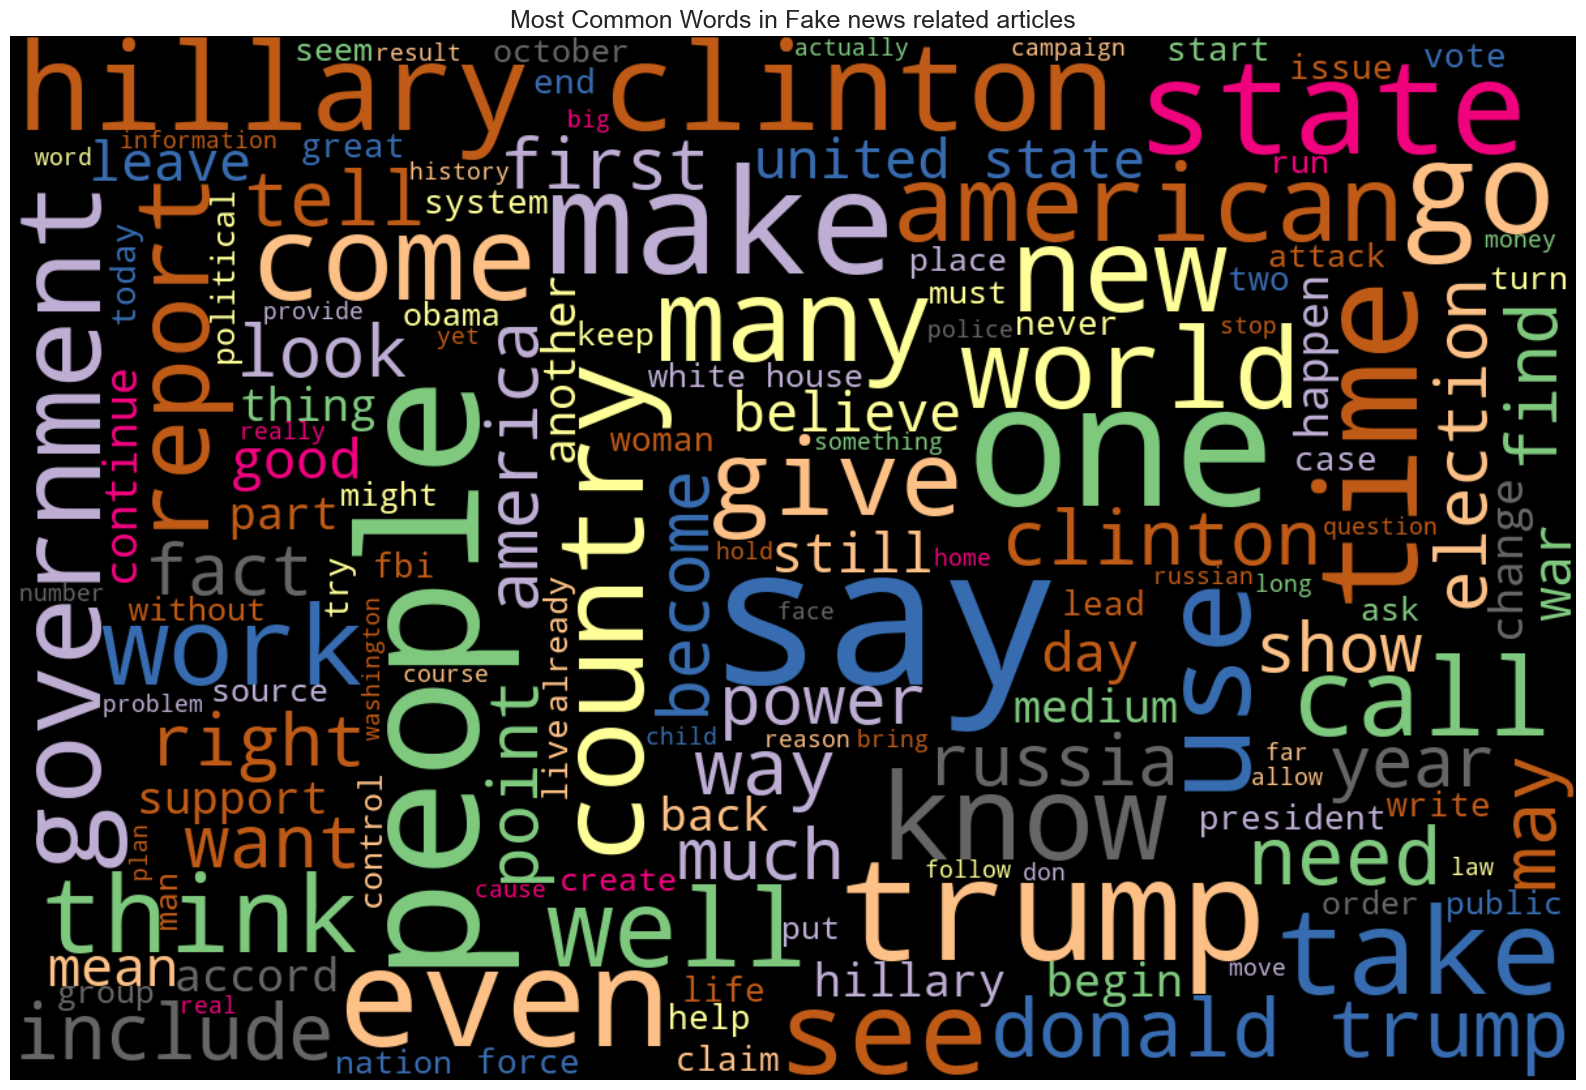

In [ ]:
Word_CL = WordCloud(background_color = "black",contour_width = 0.1,contour_color = 'grey',
                    colormap = 'Accent',mode="RGB",max_words=150,max_font_size=150,
                    width = 1200, height = 800).generate(FK_News)
plt.figure(figsize=(18,18))
plt.imshow(Word_CL,interpolation="bilinear")
plt.title("Most Common Words in Fake news related articles")
plt.axis("off")
plt.show()

In [ ]:
RL_News = df[df['label'] == 0]['content'].str.cat(sep=' ')

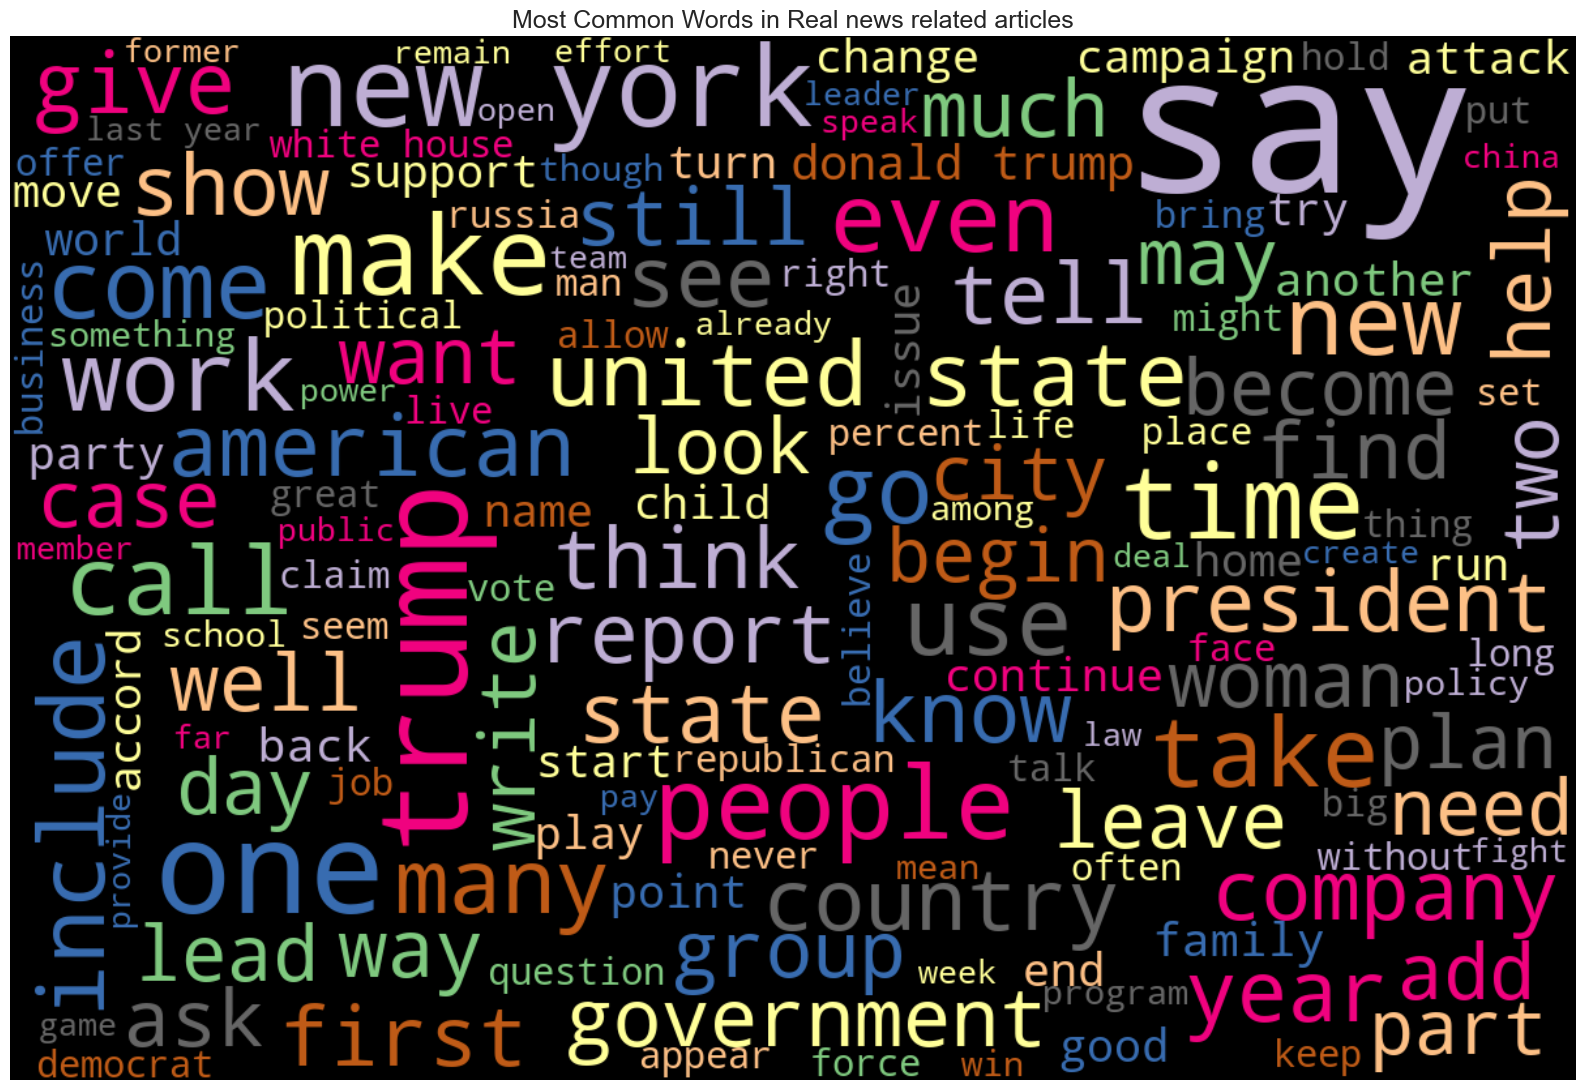

In [ ]:
Word_CL = WordCloud(background_color = "black",contour_width = 0.1,contour_color = 'grey',
                    colormap = 'Accent',mode="RGB",max_words=150,max_font_size=150,
                    width = 1200, height = 800).generate(RL_News)
plt.figure(figsize=(18,18))
plt.imshow(Word_CL,interpolation="bilinear")
plt.title("Most Common Words in Real news related articles")
plt.axis("off")
plt.show()

In [ ]:
df.head()

,title,author,text,label,content
253,Islamic State Supporting Former National Guard...,Jenna Leigh Richardson,Former National Guardsman turned Islamic State...,1,islamic state support former national guardsma...
14014,How ‘Brexit’ Will Affect Travel to Europe - Th...,Elaine Glusac,"In the height of the summer travel season, Bri...",0,brexit affect travel europe new york timesin h...
20451,Donald Trump Gettysburg Address RECAP,Truth Broadcast Network,7 hours ago 3 reports on What You Need to Kn...,1,donald trump gettysburg address recap7 hour ag...
11214,"Maxine Waters: If We Impeach Trump, He Can’t B...",Pam Key,Tuesday evening in Los Angeles at the Democr...,0,maxine water impeach trump can build wall brei...
8363,Cartoons Mightier Than Swords (VIDEO),James Tracy,"in: Civil Rights , Free Speech , Multimedia , ...",1,cartoon mightier sword videoin civil right fre...


In [ ]:
df.to_csv('Cleaned_csv',index=False)